Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

#Need code to start engine 
#create Education dataframe
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

## Q1) Determine all the variable types and find the fraction of the missing values for each variable.

In [3]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

Most variables are datatype 'float'. 

In [4]:
#Are we finding all values that are 'False' b/c of 'null' and dividing by total to get denominator
education_df.isnull().sum()/education_df.count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.213995
TOTAL_REVENUE                   0.165625
FEDERAL_REVENUE                 0.165625
STATE_REVENUE                   0.165625
LOCAL_REVENUE                   0.165625
TOTAL_EXPENDITURE               0.165625
INSTRUCTION_EXPENDITURE         0.165625
SUPPORT_SERVICES_EXPENDITURE    0.165625
OTHER_EXPENDITURE               0.213995
CAPITAL_OUTLAY_EXPENDITURE      0.165625
GRADES_PK_G                     0.131160
GRADES_KG_G                     0.097059
GRADES_4_G                      0.096253
GRADES_8_G                      0.096253
GRADES_12_G                     0.096253
GRADES_1_8_G                    0.096253
GRADES_9_12_G                   0.096253
GRADES_ALL_G                    0.131160
AVG_MATH_4_SCORE                1.783582
AVG_MATH_8_SCORE                1.804511
AVG_READING_4_SCORE             1.799250
AVG_READING_8_SC

In [5]:
education_df.isnull?

2) Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables.  For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


In [6]:
#make a copy of df
education2_df = education_df.copy()

### Option 1 is to disregard. Option 2 is to fill in using fill.na function, which is preferred and more common approach in dealing with missing values for data science. By replacing the missing values with some other value, we keep all data points in place, and we can benefit from the info hese records provide. We can impute by using the mean to fill in missing values.

In [7]:
#Imputing w/mean function
fill_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
             'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for col in fill_list:
    education2_df.loc[:,col] = education2_df.loc[:,col].fillna(education2_df.loc[:,col].mean())

print(education2_df)

             PRIMARY_KEY          STATE  YEAR         ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992  915930.820993   2.678885e+06   
1            1992_ALASKA         ALASKA  1992  915930.820993   1.049591e+06   
2           1992_ARIZONA        ARIZONA  1992  915930.820993   3.258079e+06   
3          1992_ARKANSAS       ARKANSAS  1992  915930.820993   1.711959e+06   
4        1992_CALIFORNIA     CALIFORNIA  1992  915930.820993   2.626002e+07   
...                  ...            ...   ...            ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017  915930.820993   9.092082e+06   
1488     2017_WASHINGTON     WASHINGTON  2017  915930.820993   9.092082e+06   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017  915930.820993   9.092082e+06   
1490      2017_WISCONSIN      WISCONSIN  2017  915930.820993   9.092082e+06   
1491        2017_WYOMING        WYOMING  2017  915930.820993   9.092082e+06   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE

3) Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [8]:
education3_df = education_df.copy()

In [9]:
#Imputing w/mean function from specific year
fill_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
             'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

years = education3_df["YEAR"].unique()
for col in fill_list:
    for year in years:
        
        education3_df.loc[education3_df['YEAR'] == year, col] = education3_df.loc[education3_df["YEAR"] == year, col].fillna(
            education3_df[education3_df["YEAR"] == year][col].mean())  
        print(education3_df)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017     NaN            NaN   
1488     2017_WASHINGTON     WASHINGTON  2017     NaN            NaN   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017     NaN            NaN   
1490      2017_WISCONSIN      WISCONSIN  2017     NaN            NaN   
1491        2017_WYOMING        WYOMING  2017     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

4) This time, fill in the missing values using interpolation (extrapolation).

In [10]:
education4_df = education_df.copy()

In [11]:
for col in fill_list:
    education4_df.loc[:,col] = education4_df.loc[:,col].interpolate()  
    print(education4_df)

             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992        NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992        NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992        NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992        NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992        NaN     26260025.0   
...                  ...            ...   ...        ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017  1595024.0            NaN   
1488     2017_WASHINGTON     WASHINGTON  2017  1595024.0            NaN   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017  1595024.0            NaN   
1490      2017_WISCONSIN      WISCONSIN  2017  1595024.0            NaN   
1491        2017_WYOMING        WYOMING  2017  1595024.0            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0    

5) Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [12]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

"ENROLL" has same minimum, but the SD's vary. Second method of taking the mean to fill in missing values shows the highest median, or 50th quartile, rank. 

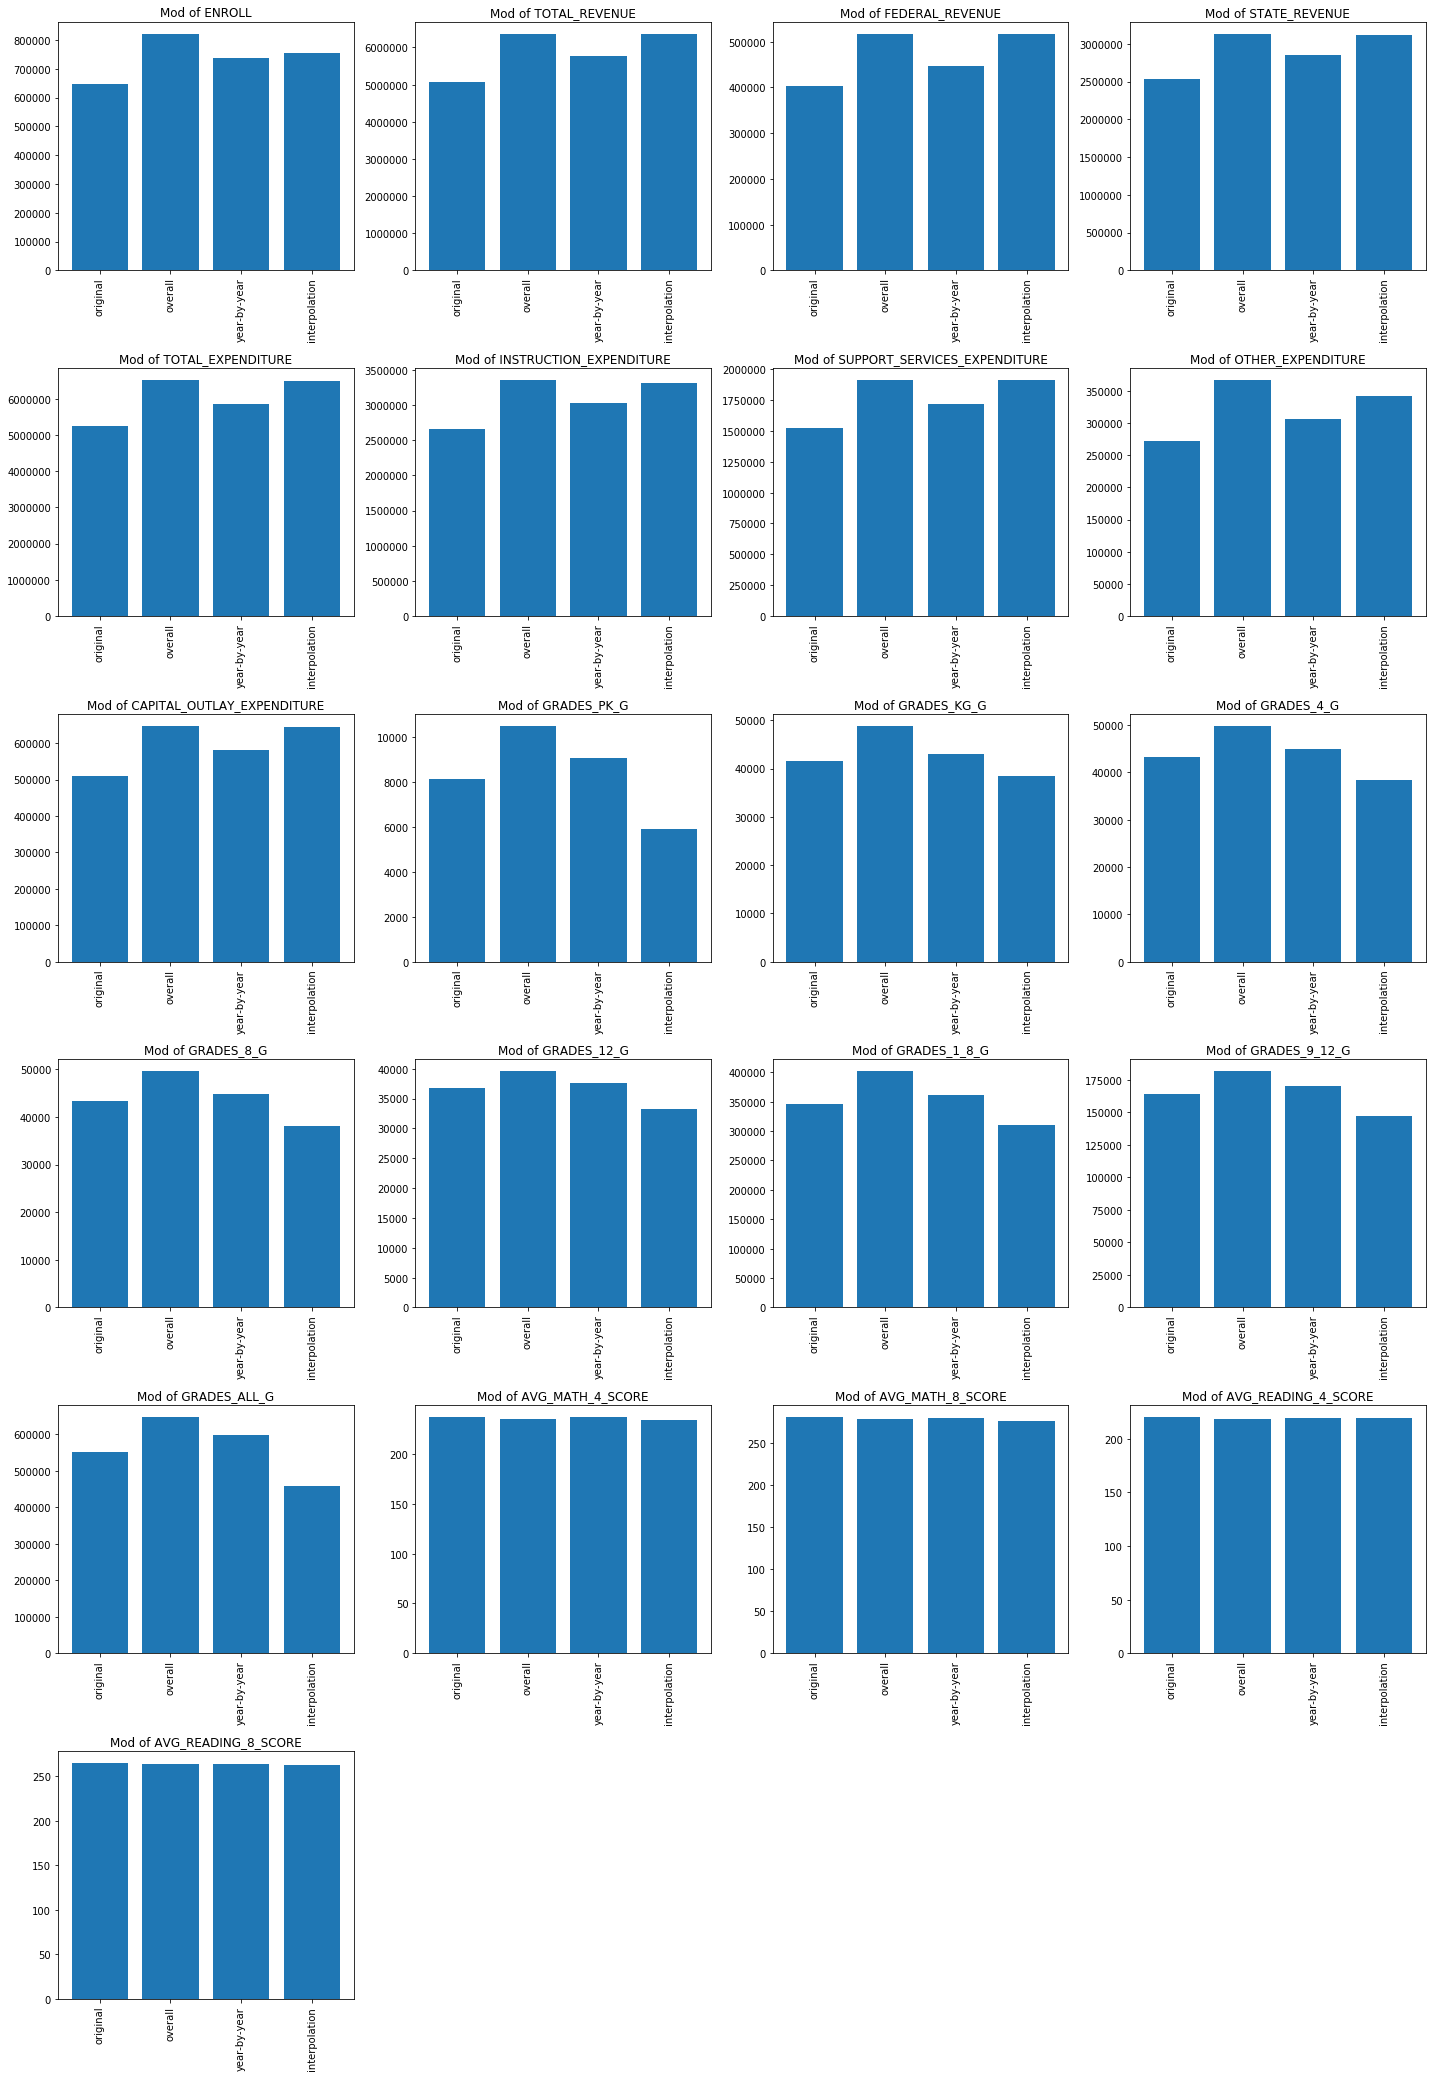

In [13]:
#Concatenate all data frames for comparison
#Where does "enumerate" come from? and why i+1? 
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([education_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()

# Part 3 of Data Cleaning: Outliers

1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

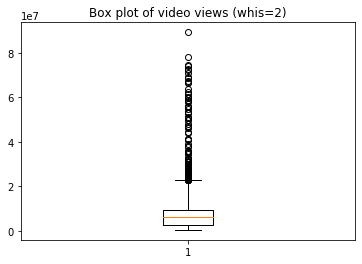

In [14]:
plt.boxplot(education2_df["TOTAL_REVENUE"],whis=2)
plt.title("Box plot of video views (whis=2)")
plt.show()

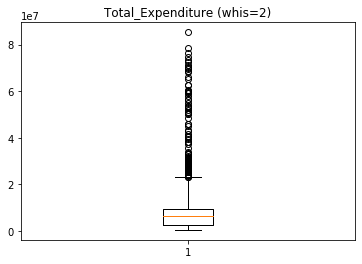

In [15]:
plt.boxplot(education2_df["TOTAL_EXPENDITURE"], whis=2)
plt.title("Total_Expenditure (whis=2)")
plt.show()

Yes. They do.

2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.


In [16]:
from scipy.stats.mstats import winsorize 
winsorized_revenue = winsorize(education2_df["TOTAL_REVENUE"], (0, 0.10))
winsorized_revenue


masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

In [17]:
winsorized_expenditure = winsorize(education2_df["TOTAL_EXPENDITURE"],(0, 0.1))
winsorized_expenditure

masked_array(data=[2653798.     ,  972488.     , 3401580.     , ...,
                   9196680.86875, 9196680.86875, 9196680.86875],
             mask=False,
       fill_value=1e+20)

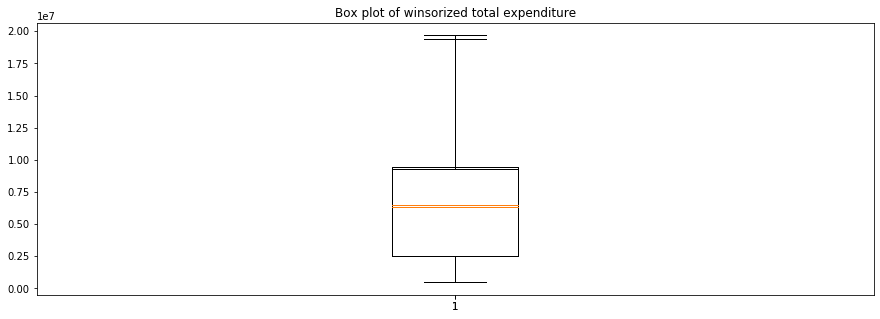

In [18]:
#Why subplot #Validating winsorized variable...but key error?
plt.figure(figsize = (15,5))

#plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

#plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


In [19]:
#New variable is budget_deficit with a new data frame. 

education2_df['budget_deficit'] = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE


In [20]:
education_df['TOTAL_EXPENDITURE'].notna().value_counts()

True     1280
False     212
Name: TOTAL_EXPENDITURE, dtype: int64

In [21]:
education2_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,budget_deficit
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2.678885e+06,3.041770e+05,1.659028e+06,715680.0,2.653798e+06,1.481703e+06,...,58025.000000,41167.00000,4.715640e+05,1.963860e+05,6.761740e+05,208.327876,252.187522,207.963517,263.661132,25087.0
1,1992_ALASKA,ALASKA,1992,915930.820993,1.049591e+06,1.067800e+05,7.207110e+05,222100.0,9.724880e+05,4.983620e+05,...,8789.000000,6714.00000,7.911700e+04,3.084700e+04,1.123350e+05,234.768293,278.414711,218.866154,258.859712,77103.0
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3.258079e+06,2.978880e+05,1.369815e+06,1590376.0,3.401580e+06,1.435908e+06,...,49081.000000,37410.00000,4.371270e+05,1.752100e+05,6.148810e+05,215.253932,265.366278,206.212716,262.169895,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1.711959e+06,1.785710e+05,9.587850e+05,574603.0,1.743022e+06,9.643230e+05,...,36011.000000,27651.00000,2.813380e+05,1.231130e+05,4.052590e+05,210.206028,256.312090,208.634458,264.619665,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,2.626002e+07,2.072470e+06,1.654651e+07,7641041.0,2.713883e+07,1.435892e+07,...,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,263.661132,-878807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,915930.820993,9.092082e+06,7.663723e+05,4.216553e+06,NaN,9.196681e+06,4.762966e+06,...,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,248.041059,290.081407,227.598382,273.402640,NaN
1488,2017_WASHINGTON,WASHINGTON,2017,915930.820993,9.092082e+06,7.663723e+05,4.216553e+06,NaN,9.196681e+06,4.762966e+06,...,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,241.701001,289.131257,223.123409,267.744778,NaN
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,915930.820993,9.092082e+06,7.663723e+05,4.216553e+06,NaN,9.196681e+06,4.762966e+06,...,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,236.057019,273.415854,217.316396,271.617023,NaN
1490,2017_WISCONSIN,WISCONSIN,2017,915930.820993,9.092082e+06,7.663723e+05,4.216553e+06,NaN,9.196681e+06,4.762966e+06,...,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,240.389213,288.143144,219.612694,258.700304,NaN


In [22]:
education_df['TOTAL_REVENUE'].shape

(1492,)

In [23]:
#budget_deficit.notna().value_counts()

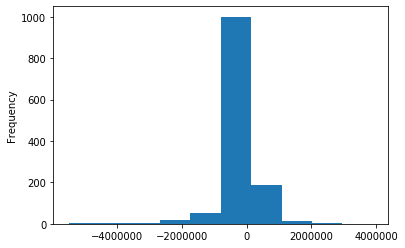

In [24]:
education2_df["budget_deficit"].plot.hist()


In [25]:
education2_df["budget_deficit"].plot.box

<bound method PlotAccessor.box of <pandas.plotting._core.PlotAccessor object at 0x11efd79d0>>

In [26]:
education2_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'budget_deficit'],
      dtype='object')

In [27]:
#Why isn't working like above?

#plt.boxplot(budget_deficit, whis=5) 
#plt.title("Box plot Budget Deficit (whis=5)")
plt.boxplot(budget_deficit)
plt.title("Box plot of budget deficit")

NameError: name 'budget_deficit' is not defined

In [ ]:
#Correct answers
education2_df["winsorized_budget"] = winsorize(education2_df["budget_deficit"], (0.5, 0.5))


4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [28]:
education2_df['winsorized_budget']

KeyError: 'winsorized_budget'

In [ ]:
education2_df['surplus'] = education2_df.TOTAL_REVENUE - education2_df.TOTAL_EXPENDITURE
education2_df['surplus']

In [ ]:
education2_df['surplus'].plot.box()
plt.title("Box plot Surplus (whis=2)")
plt.show()

Outliers are above and below in the "surplus" variable.

In [ ]:

education2_df['winsorized_surplus'] = winsorize(education2_df['surplus'], (0.05, 0.05))

#If desig

In [ ]:
winsorize?

5) Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [ ]:
pd.DataFrame({"original_budget": education2_df['budget_deficit'], "winsorized_budget1": education2_df['winsorized_budget'],
              "winsorized_surplus": education2_df['winsorized_surplus']}).describe()


The 'winsorized_budget1' mean, SD, minimum differ from original budget column. However, the interquartile ranges are the same. Spread more evenly across the line. 

6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

The method in the third question. It's better to first create a variable from the originals and then to apply outlier elimination techniques next. That's why the approach in the third question is preferable in most of the cases.

## Phase 2: Data Exploration, Step 1 of 2


###STEP 1

In [ ]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

1) Descriptive statistics for data.

In [29]:
education_df.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121



With a 1492 records, 1487 are truly unique. We see the average TOTAL_REVENUE is less than TOTAL_EXPENDITURE. This means that states run budget deficit on education on average.

The column "INSTRUCTION_EXPENDITURE" makes up almost half of the total expenditures on education.

Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores.

Q2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

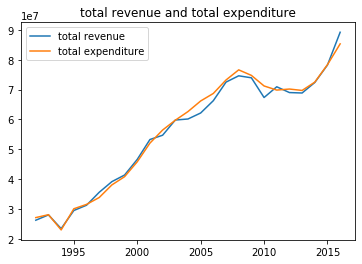

In [30]:
plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

###Q3)In your chosen state, which of the lessons are the students more successful, math or reading? 

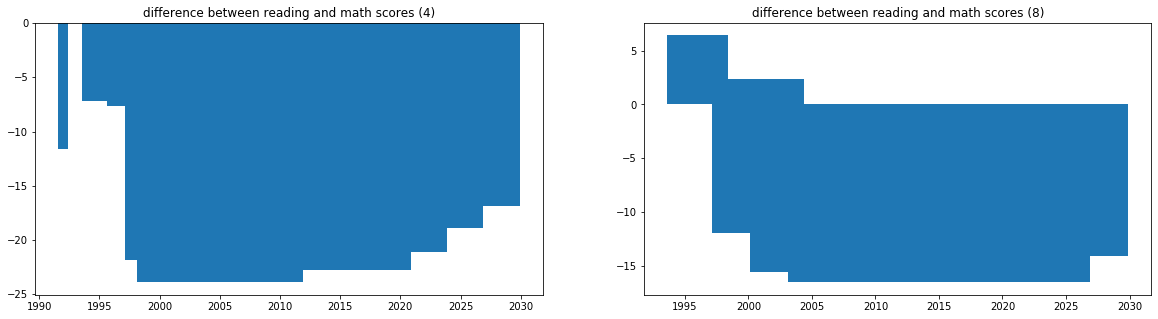

difference between reading and math scores (4)
4      -11.634547
56            NaN
108           NaN
161           NaN
213     -7.216492
264           NaN
316           NaN
367           NaN
420     -7.648537
472           NaN
524           NaN
576    -21.822545
628           NaN
680    -23.854931
731           NaN
784    -21.511905
836           NaN
891    -21.912522
944           NaN
997    -22.806357
1048          NaN
1101   -21.108497
1152          NaN
1203   -18.871396
1254          NaN
1451   -16.841127
dtype: float64
difference between reading and math scores (8)
4             NaN
56            NaN
108           NaN
161           NaN
213      6.424972
264           NaN
316           NaN
367           NaN
420      2.323040
472           NaN
524           NaN
576    -11.976121
628           NaN
680     -4.373619
731           NaN
784     -2.222356
836           NaN
891    -15.553342
944           NaN
997    -11.484551
1048          NaN
1101   -15.453063
1152          NaN
1203   -1

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

### Q4) What are the distributions of the math and reading scores in the sample?

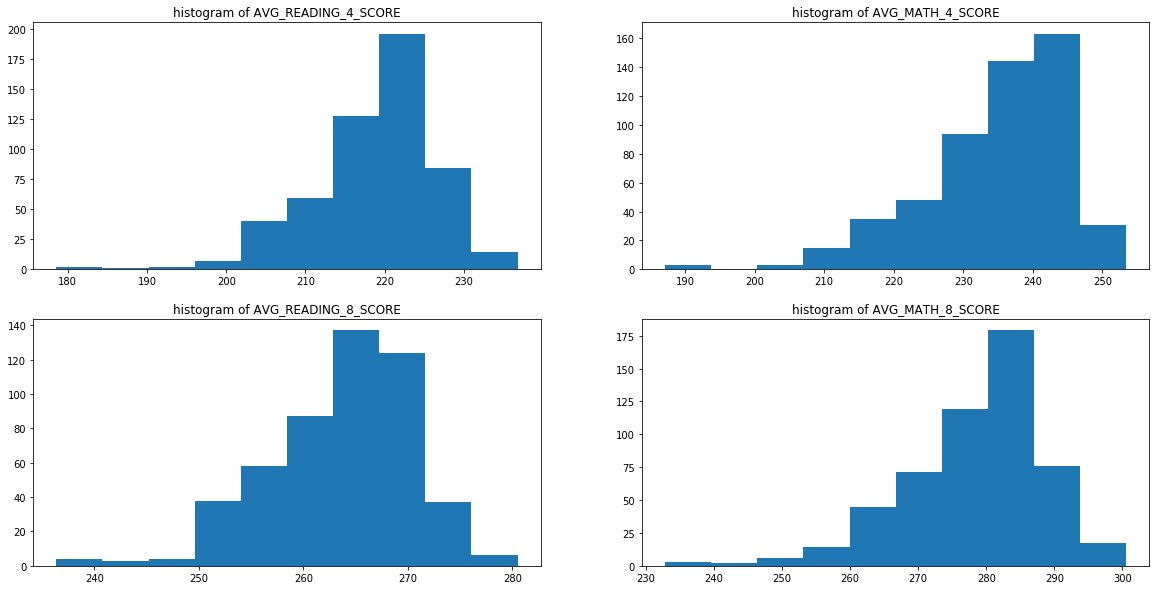

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

The distributions are not normally distributed but slightly skewed to the left for both reading and writing. This means that average of the scores are lower than the median.

### Q5)  Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [33]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

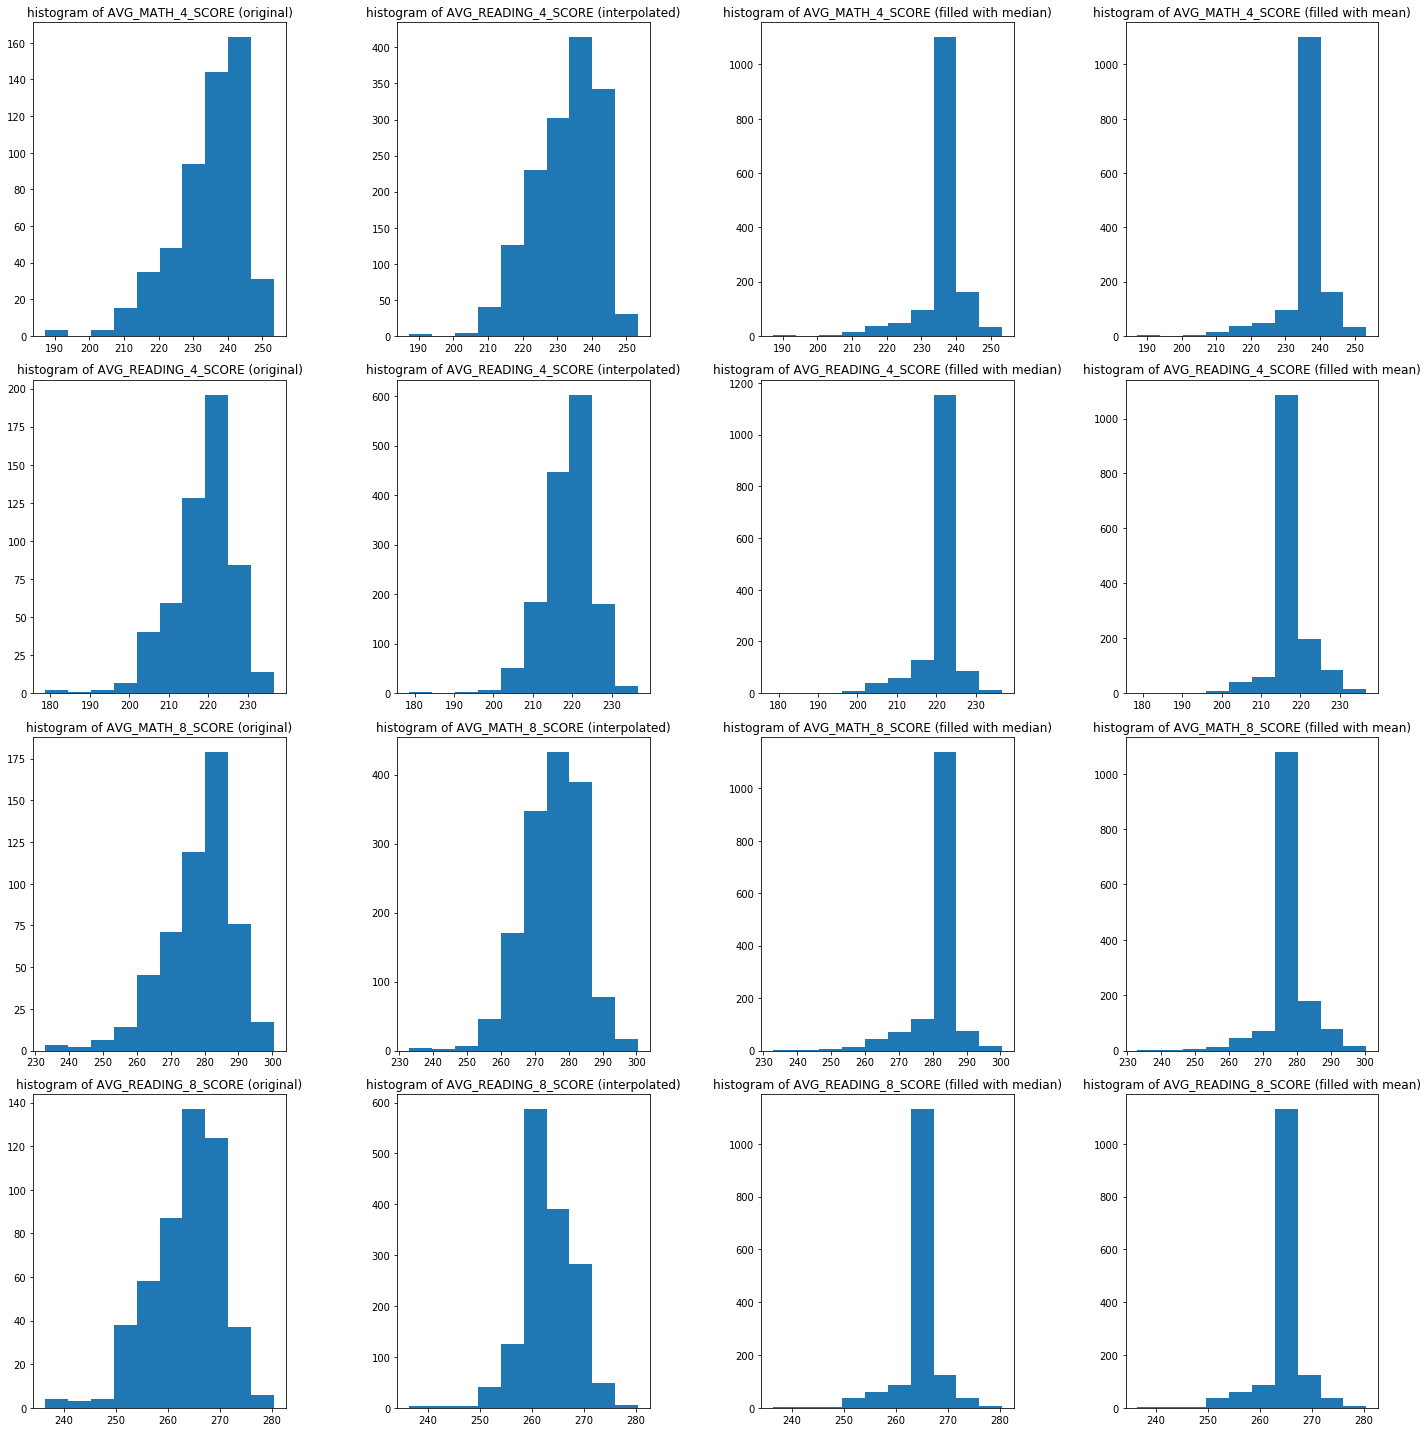

In [34]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

Response: The technique for filling in the missing values (.drop(NA)) substantially affects the distributions of the variables. Especially in our case, filling with mean or median has the strongest effect. This is probably due to the fact that we have a lot of missing values in our data.

The change in the distribution might have some serious effects on our model results. Hence, instead of filling in the missing values with mean or median, we may fill them in using interpolation (.interpolate().dropna())) or we may just discard the missing values.